In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

/Users/liang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 2:  Root Finding and Optimization

## Question 1 - Finding the Root

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  One way to do this is to solve for the zeros of the function $f(x) = x^2 - M$.

 - Note that not all the methods will work!
 - Make sure to handle the case where $M_0 = \sqrt{M}$.
 - We are only looking for the positive root of $f(x)$.

**(a)** (5 points) Write a function that uses fixed-point iteration to solve for the zeros of $f(x)$.  

Note: There are multiple ways to write the iteration function $g(x)$, some work better than others.  Make sure to use the input function $f(x)$ to formulate this.

In [2]:
def fixed_point(x_0, f, tolerance):
    """Find the zeros of the given function f using fixed-point iteration
    
    :Input:
     - *x_0* (float) - Initial iterate
     - *f* (function) - The function that will be analyzed
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *x* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    # INSERT CODE HERE
    n = 1.0
    while n <= MAX_STEPS:
        x_0 = f(x_0)
        if numpy.abs(f(x_0) - x_0) < tolerance:
            break
        else:
            n += 1
    return x_0, n


In [3]:
M = 1.8
TOLERANCE = 1e-10
f = lambda x: x**2 - M

# Note that this test probably will fail
try:
    M_f, n = fixed_point(2.0, f, TOLERANCE)
except OverflowError:
    print "Fixed-point test failed!"
    print "Success!"
else:
    if n == -1:
        print "Fixed-point test failed!"
        print "Success!"
    else:
        print M_f, n
        raise ValueError("Test should have failed!")

Fixed-point test failed!
Success!


**(b)** (5 points) Write a function that uses Newton's method to find the roots of $f(x)$. The analytical derivative of $f'(x)$ is provided.

In [4]:
def newton(x_0, f, f_prime, tolerance):
    """Find the zeros of the given function f using Newton's method
    
    :Input:
     - *M_0* (float) - Initial iterate
     - *f* (function) - The function that will be analyzed
     - *f_prime* (function) - The derivative of *f*
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *M* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    # INSERT CODE HERE
    if numpy.abs(f(x_0)) < tolerance:
        return x_0, 0
    else:
        n = 1.0
        while n <= MAX_STEPS:
            x_0 = x_0 - f(x_0) / f_prime(x_0)
            if numpy.abs(f(x_0)) < tolerance:
                break
            elif n == MAX_STEPS:
                print "n reach max step, bad guess"
            else:
                n += 1
        return x_0, n
    

In [5]:
M = 3.0
TOLERANCE = 1e-10
f = lambda x: x**2 - M
f_prime = lambda x: 2.0 * x

M_f, n = newton(2.0, f, f_prime, TOLERANCE)
numpy.testing.assert_almost_equal(M_f, numpy.sqrt(M))
print M_f, n
assert(n == 4)

M_f, n = newton(numpy.sqrt(M), f, f_prime, TOLERANCE)
print M_f, n
assert(n == 0)

print "Success!"

1.73205080757 4.0
1.73205080757 0
Success!


**(c)** (5 points) Write a function to find the zeros of $f(x)$ using the secant method.

In [6]:
def secant(x_0, f, tolerance):
    """Find the zeros of the given function f using the secant method
    
    :Input:
     - *M_0* (float) - Initial bracket
     - *f* (function) - The function that will be analyzed
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *M* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    # INSERT CODE HERE
    n = 1.0
    k_kp = 0.0
    x_k = x_0[1]
    x_km = x_0[0]
    if numpy.abs(f(x_k)) < tolerance:
        return x_k, 0
    elif numpy.abs(f(x_km)) < tolerance:
        return x_km, 0
    else:
        n = 1.0
        while n <= MAX_STEPS:
            x_kp = x_k - f(x_k) * (x_k - x_km) / (f(x_k) - f(x_km))
            x_km = x_k
            x_k = x_kp
            if numpy.abs(f(x_k)) < tolerance:
                break
            elif n == MAX_STEPS:
                print "n reach max step, bad guess"
            else:
                n += 1
            
    return x_kp, n
    

In [7]:
M = 3.0
TOLERANCE = 1e-10
f = lambda x: x**2 - M

M_f, n = secant([0.0, 3.0], f, TOLERANCE)
numpy.testing.assert_almost_equal(M_f, numpy.sqrt(M))
print M_f, n
assert(n == 7)

M_f, n = secant([1.0, numpy.sqrt(M)], f, TOLERANCE)
assert(n == 0)

print "Success!"

1.73205080757 7.0
Success!


**(d)** (5 points) Using the theory and illustrative plots why the fixed-point method did not work (pick a bracket that demonstrates the problem well).  

The range is not contained within the domain and therefore fixed-point iteration will not converge.  The plot below should be included.

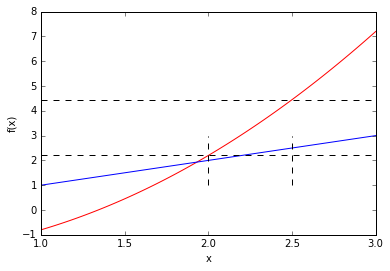

In [8]:
x = numpy.linspace(1.0, 3.0, 100)
f = lambda x: x**2 - 1.8
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")

axes.plot(numpy.ones(x.shape) * 2.0, x, '--k')
axes.plot(numpy.ones(x.shape) * 2.5, x, '--k')
axes.plot(x, numpy.ones(x.shape) * f(2.0), '--k')
axes.plot(x, numpy.ones(x.shape) * f(2.5), '--k')

plt.show()

## Question 2 - Bessel Function Zeros

The zeros of the Bessel functions $J_0(x)$ can be important for a number of applications.  Considering only $x \geq 0$ 
we are going to find the first ten zeros of $J_0(x)$ by using a hybrid approach.

**(a)** (5 points) Plot the Bessel function $J_0(x)$ and its zeros on the same plot.  Note that the module `scipy.special` contains functions dealing with the Bessel functions (`jn`).

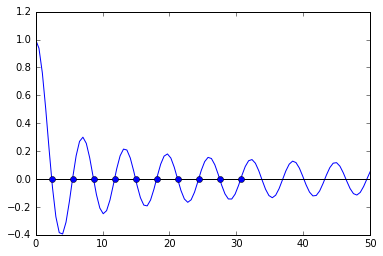

In [9]:
import scipy.special as spl

x = numpy.linspace(0,50,100)
y = spl.jn(0,x)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, y, 'b')
axes.plot(x, numpy.zeros(x.shape),'k-')
zeros = spl.jn_zeros(0, 10)
axes.plot(zeros, numpy.zeros(10) ,'o',)

plt.show()

**(b)** (15 points) Now write a function `j0_zeros` that takes two tolerances, a bracket size tolerance `bracket_tolerance` and `tolerance` for the final convergence tolerance.  Given an initial bracket, the function should perform secant iterations until the bracket size is less than `bracket_tolerance`.  If this is successful then proceed with Newton's method using the newest value of the bracket until `tolerance` is reached.  Return both the zero found and the number of steps needed in each iteration.  Also write a `doc-string` for the function.

Notes:
 - Newton's method by itself does not work here given the initial brackets provided.
 - The secant method does work however it is slower than the approach outlined.
 - Try playing a bit yourself with the tolerances used.

In [13]:
import scipy.special

# Note that the num_steps being returned should be a list 
# of the number of steps being used in each method
def j0_zeros(x0, bracket_tolerance, tolerance):
    """Find roots of Bessel Function with the error in tolerance
    
    :Input:
     - *x_0* (list) - Initial guess with two points
     - *bracket_tolerance* (float) - The tolerance that secant method should satisfy
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *x* (float) - the root we find that meet satisfy.
     - *num_steps* (list) - Number of iterations it took to achieve the bracket_tolerance and
       tolerance.
    otherwise
     - *x* (float) - Last iterate found
     - *num_steps* (list) - *n = -1*
    """
    
    # INSERT CODE HERE
    
    #initial num_steps to store how many steps it take to meet secant tolerance and Newton's method tolerance
    num_steps = [0, 0]
    MAX_STEPS = 30
    #initial values to do iteration
    k_kp = 0.0
    x_k = x0[1]
    x_km = x0[0]
    #if the values that gives to us can meet Newton's tolerance directly
    if numpy.abs(scipy.special.j0(x_k)) < tolerance:
        return x_k, num_steps
    elif numpy.abs(scipy.special.j0(x_km)) < tolerance:
        return x_km, num_steps
    #if the values meet Secant's tolerance, but not Newton's tolerance
    elif numpy.abs(scipy.special.j0(x_k)) < bracket_tolerance:
        # Newton's method
        while num_steps[1] <= MAX_STEPS:
            x_k = x_k - scipy.special.j0(x_k) / scipy.special.jvp(0, x_k, 1)
            if numpy.abs(scipy.special.j0(x_k)) < tolerance:
                return x_k, num_steps
            elif num_steps[1] == MAX_STEPS:
                print "Reach max steps when approaching Newton's tolerance"
                break
            else:
                num_steps[1] += 1
                
    elif numpy.abs(scipy.special.j0(x_km)) < bracket_tolerance:
        # Newton's method
        while num_steps[1] <= MAX_STEPS:
            x_km = x_km - scipy.special.j0(x_km) / scipy.special.jvp(0, x_km, 1)
            if numpy.abs(scipy.special.j0(x_km)) < tolerance:
                return x_km, num_steps
            elif num_steps[1] == MAX_STEPS:
                print "Reach max steps when approaching Newton's tolerance for x_km"
                break
            else:
                num_steps[1] += 1
    
    # if initial values are bigger than Secant's tolerance, we do secant's method
    else:  
        while num_steps[0] <= MAX_STEPS:
            num_steps[0] += 1
            x_kp = x_k - scipy.special.j0(x_k) * (x_k - x_km) / (scipy.special.j0(x_k) - scipy.special.j0(x_km))
            x_km = x_k
            x_k = x_kp
            if numpy.abs(scipy.special.j0(x_k)) < bracket_tolerance:
                #pass above means we find new result, then check if it can pass smaller tolerance
                if numpy.abs(scipy.special.j0(x_k)) < tolerance:
                    return x_k, num_steps
                #if pass, we good to go
                else:
                    #if not, we do Newton to get there
                    while num_steps[1] <= MAX_STEPS:
                        x_k = x_k - scipy.special.j0(x_k) / scipy.special.jvp(0, x_k, 1)
                        if numpy.abs(scipy.special.j0(x_k)) < tolerance:
                            return x_k, num_steps
                        elif num_steps == MAX_STEPS:
                            print "Newton's methods reach max steps after done secant's method"
                            break
                        else:
                            num_steps[1] += 1            
            elif num_steps[0] == MAX_STEPS:
                print "Secant's method reach max"
                break
            else:
                pass
                
    return x_k, num_steps
 



In [14]:
brackets = [[ 2.0,  3.0], [ 4.0,  7.0], [ 7.0, 10.0], [10.0, 12.0], 
            [13.0, 15.0], [17.0, 19.0], [19.0, 22.0], 
            [22.0, 26.0], [26.0, 29.0], [29.0, 32.0]]

zero = []
for bracket in brackets:
    x, num_steps = j0_zeros(bracket, 1e-1, 1e-15)
    print x, num_steps
    zero.append(x)
numpy.testing.assert_allclose(zero, scipy.special.jn_zeros(0, 10), rtol=1e-14)
print "Success!"

2.4048255577 [1, 3]
5.52007811029 [1, 3]
8.65372791291 [1, 2]
11.791534439 [0, 3]
14.9309177085 [0, 2]
18.0710639679 [1, 1]
21.2116366299 [1, 3]
24.3524715307 [1, 3]
27.493479132 [1, 2]
30.6346064684 [1, 2]
Success!


## Question 3 - Newton's Method Convergence

Recall that Newton's method converges as

$$|\epsilon_{n+1}| = \frac{|f''(c)|}{2 |f'(x_n)|} |\epsilon_n|^2$$

with $\epsilon_n = x_n - x^*$ where $x^*$ is the true solution and $c$ is between $x_n$ and $x^*$.

**(a)** (10 points) Show that the Newton iteration when $f(x) = x^2 - M$ with $M > 0$ is

$$x_{n+1} = \frac{1}{2} \left (x_n + \frac{M}{x_n} \right )$$

Since $$f(x) = x^2 - M$$ with M >0,
to apply Newton's method, we have $$f'(x) = 2x$$
$$x_{n+1} = x_n-\frac{f(x_n)}{f'(x_n)}$$
$$x_{n+1} = x_n - \frac{x_n^2 - M}{2x_n}$$
$$x_{n+1} = x_n - \frac{x_n^2}{2x_n} + \frac{M}{2x_n}$$
$$x_{n+1} = \frac{x_n}{2} + \frac{M}{2x_n}$$
thus we have $$x_{n+1} = \frac{1}{2}(x_n + \frac{M}{x_n})$$

**(b)** (10 points) From this update scheme show that 

$$\frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2 x_n}$$

from **(a)** we know $$x_{n+1} = \frac{1}{2}(x_n + \frac{M}{x_n})$$
multiply $2x_n$ on each side $$2x_n \cdot x_{n+1} = 2x_n \cdot \frac{1}{2}(x_n + \frac{M}{x_n})$$
we have $$2x_n \cdot x_{n+1} = x_n^2 + M$$
subtract $$2x_n\sqrt{M}$$ from each side $$2x_n \cdot x_{n+1} - 2x_n\sqrt{M} = x_n \cdot x_n^2 + M - 2x_n\sqrt{M}$$
$$2x_n(x_{n+1} - \sqrt{M}) = (x_n - \sqrt{M})^2$$
then, we have $$\frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2x_n}$$

**(c)** (10 points) Confirm that the asymptotic error convergence matches the general convergence for Newton's method.

Since we know $$f(x) = x^2 - M$$
the actual root is $$x = \pm\sqrt{M}$$
we have the error $|\epsilon_{n+1}|$, $$|\epsilon_{n+1}| = |x_{n+1} - \sqrt{M}|$$
$$|\epsilon_{n}| = |x_{n} - \sqrt{M}|$$
from **(b)** we have $$\frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2x_n}$$
which implies $$|\frac{\epsilon_{n+1}}{\epsilon_{n}^2}| = |\frac{1}{2x_n}|$$
$$|\epsilon_{n+1}| = |\frac{\epsilon_{n}^2}{2x_n}|$$
so, it matches the general convergence fro Newton's method

## Question 4 - Optimization of a Data Series

For the following questions we are given a set of data $(t_0, y_0), (t_1, y_1), \ldots, (t_N, y_N)$.

**(a)** (15 points) Write a function that takes in the data series $(t_i, y_i)$ and finds the value at a point $t_\ast$ by constructing the equation of the line between the two data points that bound $t_\ast$ and evaluating the resulting function at $t_\ast$.  Write a `doc-string` for the function.

Hints:
 - Make sure to handle the case that $t_\ast = t_i$.
 - If $t_\ast < t_0$ or $t_\ast > t_N$ then return the corresponding value $y_0$ or $y_N$.
 - If you write your function so that $t_\ast$ can be an array you can use the plotting code in the cell.  Otherwise just delete it.

In [15]:
def linear_eval(t, y, t_star):
    """Find the corresponding y-value of t_star
    
    :Input:
     - *t* (array) - Initial values
     - *y* (array) - Corresponding points of t
     - *t_star* (float) - the value that we want to evaluate
     
    :Output:
    If the iteration was successful the return values are:
     - *y_star* (float) - the value we find that corresponding to t_star
    otherwise
     - *y_star* (float) - *n = -1.0*
    """
    
    #INSERT CODE HERE
     
    N = len(t)
    #if t_star less than t[0], return y[0]
    if t_star < t[0]:
        y_star = y[0]
        return
    #if t_star greater than t[-1], return y[-1]
    elif t_star > t[-1]:
        y_star = y[-1]
        return
    else:
        for i in xrange(0, N):
            if t_star == t[i]:
                y_star = y[i]
            #case: t_star greater than t[i] but less than t[i+1]
            elif t_star > t[i] and t_star < t[i+1]:
                y_star = ((y[i+1] - y[i])/(t[i+1] - t[i])) * (t_star - t[i]) + y[i]
            else:
                pass
    return y_star

# N = 10
# t_fine = numpy.linspace(-numpy.pi, numpy.pi, 100)
# t_rand = numpy.random.rand(N + 1) * (2.0 * numpy.pi) - numpy.pi
# t_rand.sort()
# f = lambda x: numpy.sin(x) * numpy.cos(x)

# fig = plt.figure()
# fig.set_figwidth(fig.get_figwidth()*1.5)
# axes = fig.add_subplot(1, 1, 1)
# axes.plot(t_fine, f(t_fine), 'k-', label="True")
# axes.plot(t_rand, f(t_rand), 'og', label="Sample Data")
# axes.plot(t_fine, linear_eval(t_rand, f(t_rand), t_fine), 'xb', label="linear_eval")
# axes.set_xlim((-numpy.pi, numpy.pi))
# axes.set_title("Demo Plot")
# axes.set_xlabel('$t$')
# axes.set_ylabel('$f(t)$')
# axes.legend()
# plt.show()

In [16]:
N = 100
f = lambda x: numpy.sin(x) * numpy.cos(x)
t = numpy.linspace(-1, 1, N + 1)
t_star = 0.5
answer = linear_eval(t, f(t), t_star)
if isinstance(answer, list):
    answer = answer[0]
print "Computed solution: %s" % answer
print "True solution: %s" % f(t_star)
numpy.testing.assert_almost_equal(answer, f(t_star), verbose=True, decimal=7)
print "Success!"

Computed solution: 0.420735492404
True solution: 0.420735492404
Success!


**(b)** (10 points) Using the function you wrote in part (a) write a function that uses Golden search to find the minimum of a series of data.  Again you can use the plotting code available if your `linear_eval` function from part (a) handles arrays.  Write a `doc-string` for the function.

Code Success!
  t* = 0.74585074506
  f(t*) = 1.4131077927
  number of steps = 21


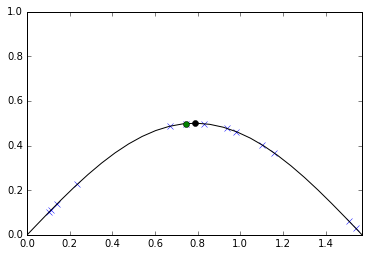

In [21]:
def golden_search(bracket, t, y, max_steps=100, tolerance=1e-4):
    """Find the corresponding t value of reaching the max point
    
    :Input:
     - *bracket* (array) - Initial interval
     - *t* (array) - The initial t pionts
     - *y* (array) - The corresponding y values of t points
     
    :Output:
    If the iteration was successful the return values are:
     - *t_star* (float) - The corresponding t value of the max point
    otherwise
     - *t_star* (float) - Last iterate found
    """

    phi = (numpy.sqrt(5.0) - 1.0) / 2.0
    
    # INSERT CODE HERE
    a = bracket[0]
    b = bracket[1]
    c = b - phi * (b - a)
    d = a + phi * (b - a)
    t_star = 0.0

    success = False
    for n in xrange(1, max_steps + 1):
        
        #to evaluate f_c and f_d using linear_eval function 
        linear_eval_c = linear_eval(t, y, c)
        linear_eval_d = linear_eval(t, y, d)
        # if f_c is bigger than f_d, we know the trending to max is on the left side
        if linear_eval_c > linear_eval_d:
            b = d
            d = c
            c = b - phi * (b - a)
        else:
            a = c
            c = d
            d = a + phi * (b - a)

        if numpy.abs(b - a) < 1e-4:
            success = True
            t_star = (a + b)/2.0
            break

    if success:
        print "Code Success!"
        print "  t* = %s" % str((b + a) / 2.0)
        print "  f(t*) = %s" % f((b + a) / 2.0)
        print "  number of steps = %s" % n
    else:
        print "Reached maximum number of steps!" 

    return t_star

N = 50
t = numpy.random.rand(N + 1) * (2.0 * numpy.pi) - numpy.pi
t.sort()
y = numpy.sin(t) * numpy.cos(t)
t_star = golden_search([0.1, 3.0 * numpy.pi / 4.0], t, y)
t_true = numpy.pi / 4.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t, y, 'x', label="data")
t_fine = numpy.linspace(-numpy.pi, numpy.pi, 100)
axes.plot(t_fine, numpy.sin(t_fine) * numpy.cos(t_fine), 'k', label="$f(x)$")
axes.plot(t_star, linear_eval(t, y, t_star), 'go')
axes.plot(t_true, numpy.sin(t_true) * numpy.cos(t_true), 'ko', label="True")
axes.set_xlim((0.0, numpy.pi / 2.0))
axes.set_ylim((0.0, 1.0))
plt.show()

In [22]:
N = 100
t = numpy.random.rand(N + 1) * (2.0 * numpy.pi) - numpy.pi
t.sort()
y = numpy.sin(t) * numpy.cos(t)
t_star = golden_search([0.1, 3.0 * numpy.pi / 4.0], t, y)
t_true = numpy.pi / 4.0
abs_error = numpy.abs(t_star - t_true)
rel_error = numpy.abs(t_star - t_true) / numpy.abs(t_true)
print "Error: %s, %s" % (abs_error, rel_error)
numpy.testing.assert_allclose(abs_error, 0.0, rtol=1e-1, atol=1e-1)
print "Success!"

Code Success!
  t* = 0.832886268932
  f(t*) = 1.41261925126
  number of steps = 21
Error: 0.0474881055346, 0.0604637338712
Success!


**(c)** (5 points) Below is sample code that plots the number of sample points $N$ vs. the relative error.  Note because we are sampling at random points that we do each $N$ 6 times and average the relative error to reduce noise.  Additionally a line is drawn representing what would be linear (1st order) convergence.

Modify this code and try it out on other problems.  Do you continue to see linear convergence?  What about if you change how we sample points?  Make sure that you change your initial interval and range of values of $t$ inside the loop.

Code Success!
  t* = 0.641805003554
Code Success!
  t* = 0.573894697307
Code Success!
  t* = 0.723601685887
Code Success!
  t* = 0.89630348445
Code Success!
  t* = 0.802239317096
Code Success!
  t* = 0.507708910859
Code Success!
  t* = 0.520459055942
Code Success!
  t* = 0.78067903844
Code Success!
  t* = 0.738005931614
Code Success!
  t* = 0.782723619277
Code Success!
  t* = 0.802090166934
Code Success!
  t* = 0.720201304731
Code Success!
  t* = 0.798207125714
Code Success!
  t* = 0.776682056636
Code Success!
  t* = 0.825936356458
Code Success!
  t* = 0.822926455495
Code Success!
  t* = 0.871470214084
Code Success!
  t* = 0.796978714842
Code Success!
  t* = 0.742187273157
Code Success!
  t* = 0.779862868476
Code Success!
  t* = 0.775177106154
Code Success!
  t* = 0.777818287639
Code Success!
  t* = 0.776646847059
Code Success!
  t* = 0.849185945334
Code Success!
  t* = 0.76579213265
Code Success!
  t* = 0.773281675479
Code Success!
  t* = 0.803836447446
Code Success!
  t* = 0.79099412

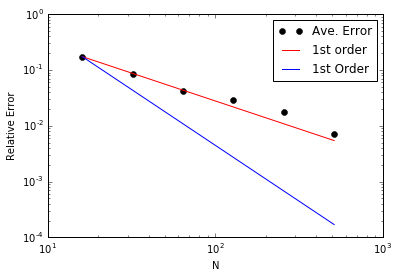

In [20]:

#f = lambda t: numpy.sin(t) * numpy.cos(t)
#new function1:
#f = lambda t: numpy.sin(t)* numpy.exp(t)
#new function2:
#f = lambda t: t**3 + 4*t**2 + numpy.pi
#new function3:
f = lambda t: numpy.sin(t) + numpy.cos(t)
N_range = numpy.array([2**n for n in range(4, 10)], dtype=int)
rel_error = numpy.zeros(len(N_range))
t_true = numpy.pi / 4.0
#get the random numbers x and its associate y, then use them to find correspongding t_star
for (i, N) in enumerate(N_range):
    #loop 6 times and find the relative error then take average of them
    for j in xrange(6):
        t = numpy.random.rand(N + 1) * (2.0 * numpy.pi) - numpy.pi #original way to sample points
        #t = numpy.random.rand(N) #new way to sample points
        t.sort()
        y = f(t)
        t_star = golden_search([0.1, 3.0 * numpy.pi / 4.0], t, y)
        rel_error[i] += numpy.abs(t_star - t_true) / numpy.abs(t_true)
    rel_error[i] /= 6

order_C = lambda N, error, order: numpy.exp(numpy.log(error) - order * numpy.log(N))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(N_range, rel_error, 'ko', label="Ave. Error")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -1.0) * N_range**(-1.0), 'r', label="1st order")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -2.0) * N_range**(-2.0), 'b', label="1st Order")
axes.set_xlabel("N")
axes.set_ylabel("Relative Error")
axes.legend()
plt.show()

When I changed the way how we sample points , it didn't have much influence on the convergence of the function. Average error is usually between 1st order and 2nd order.
However, if I change the functions, for example, I tried three functions, it has different performance.
```python
f = lambda t: numpy.sin(t)* numpy.exp(t)
```
the average error not converge
```python
f = lambda t: t**3 + 4*t**2 + numpy.pi
```
the average error not converge
```python
f = lambda t: numpy.sin(t) + numpy.cos(t)
```
the average error converge, mainly follow first order and sometimes beyond the first order line.